In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting pandas display options
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [3]:
# Loading the dataset
data=pd.read_csv("data.csv")
print(data.shape)
data.head()

(58592, 44)


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


#### Data analysis and transformation 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
data.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [6]:
data.duplicated().sum()

0

0    93.603222
1     6.396778
Name: is_claim, dtype: float64


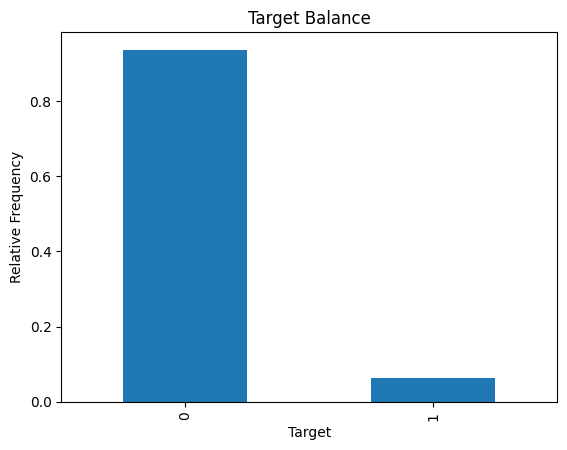

In [7]:
# Target variable distribution
print(data['is_claim'].value_counts()/data.shape[0] * 100)
data["is_claim"].value_counts(normalize=True).plot(kind="bar")
plt.ylabel("Relative Frequency")
plt.xlabel("Target")
plt.title("Target Balance");

In [8]:
# Checking for high cardinality categorical features
data.select_dtypes("object").nunique()

policy_id                           58592
area_cluster                           22
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
transmission_type                       2
steering_type                           3
is_front_fog_lights                     2
is_rear_window_wiper                    2
is_rear_window_washer                   2
is_rear_window_defogger                 2
is_brake_assist                         2
is_power_door_locks                     2
is_central_locking                      2
is_power_steering                 

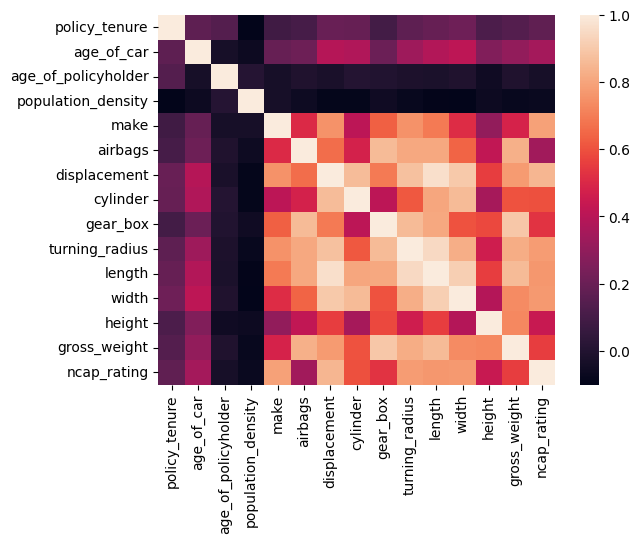

In [9]:
## Checking for multicollinearity 
correlation = data.select_dtypes("number").drop("is_claim", axis=1).corr()
sns.heatmap(correlation);

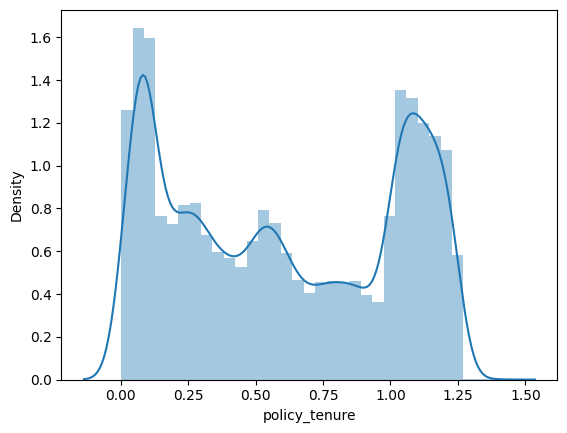

In [10]:
# Checking for outliers
sns.distplot(data["policy_tenure"]);

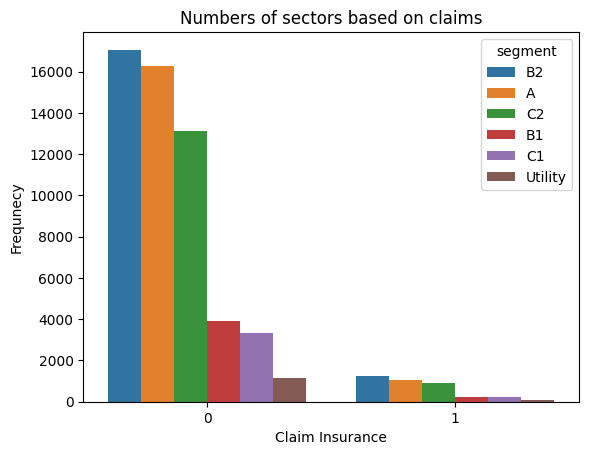

In [11]:
# Numbers of segments based on cliams

ffg = data.groupby("is_claim")["segment"].value_counts().rename("Frequency").to_frame().reset_index()
sns.barplot(x="is_claim",
           y="Frequency",
           hue="segment",
           data=ffg)
plt.xlabel("Claim Insurance")
plt.ylabel("Frequnecy")
plt.title("Numbers of sectors based on claims");

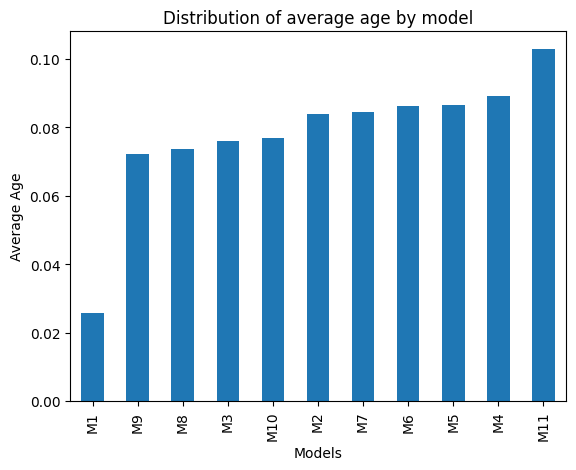

In [12]:
## Distribution of average age by model
data.groupby("model")["age_of_car"].mean().sort_values().plot(kind="bar")
plt.xlabel("Models")
plt.ylabel("Average Age")
plt.title("Distribution of average age by model");

In [13]:
# Dropping unwanted columns
data=data.drop(columns=['policy_id',"area_cluster","make",
                     "model","fuel_type","airbags",
                      "cylinder"])

In [14]:
# Encoding categorical data types
data=pd.get_dummies(data,drop_first=True)

#### Splitting the data into training and testing sets 

In [15]:
target = "is_claim"
X = data.drop(target, axis=1)
y = data[target]
print(X.shape, y.shape)

(58592, 64) (58592,)


In [16]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

##### Balancing the target variable 

In [17]:
sampler = RandomOverSampler(random_state=1)
X_train_over, y_train_over = sampler.fit_resample(X_train,y_train)
print(X_train_over.shape, y_train_over.shape)

(87764, 64) (87764,)


#### Random Forest Classifier Model 

In [18]:
# Defining the model
rf = make_pipeline(RandomForestClassifier(random_state=1))

In [19]:
# Fitting the model to the training data
rf.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=1))])

In [20]:
# Generating predictions using the trained model on the testing data
y_pred = rf.predict(X_test)
# Accuracy score of the trained model on the test data
score = accuracy_score(y_test, y_pred)
print(f'The test accuracy score of Random Forest Classifier is %.2f' % (score *100)+'%')

The test accuracy score of Random Forest Classifier is 93.21%


#### Neural Network Classifier Model 

In [21]:
# Converting the data into arryas
x_train_over = np.asarray(X_train).astype(np.float32)
y_train_over = np.asarray(y_train).astype(np.float32)

In [22]:
# Define sequential neural network model
model = keras.Sequential([
    # input layer
    keras.layers.Dense(19, input_shape=(64,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # output layer with sigmoid activation function
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [23]:
# Summary of the neural network model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                1235      
                                                                 
 dense_1 (Dense)             (None, 15)                300       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,706
Trainable params: 1,706
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
# Compiling the neural network model
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# Fitting the neural network model to the training data
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1465/1465 [==============================] - 4s 2ms/step - loss: 13.1681 - accuracy: 0.8759
Epoch 2/10
1465/1465 [==============================] - 3s 2ms/step - loss: 0.6787 - accuracy: 0.8995
Epoch 3/10
1465/1465 [==============================] - 4s 2ms/step - loss: 0.5674 - accuracy: 0.9102
Epoch 4/10
1465/1465 [==============================] - 3s 2ms/step - loss: 0.4110 - accuracy: 0.9202
Epoch 5/10
1465/1465 [==============================] - 4s 2ms/step - loss: 0.3980 - accuracy: 0.9252
Epoch 6/10
1465/1465 [==============================] - 3s 2ms/step - loss: 0.3073 - accuracy: 0.9323
Epoch 7/10
1465/1465 [==============================] - 3s 2ms/step - loss: 0.2979 - accuracy: 0.9330
Epoch 8/10
1465/1465 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9342
Epoch 9/10
1465/1465 [==============================] - 4s 2ms/step - loss: 0.2685 - accuracy: 0.9352
Epoch 10/10
1465/1465 [==============================] - 3s 2ms/step - loss: 0.24

In [25]:
# Evaluating the neural network classifier model trained on the testing data
_, accuracy = model.evaluate(X_test, y_test)
print(f'The test accuracy score of Neural Network Classifier is %.2f ' % (accuracy *100) +'%')

367/367 [==============================] - 1s 2ms/step - loss: 0.2427 - accuracy: 0.9354
The test accuracy score of Neural Network Classifier is 93.54 %
